In [3]:
import random as rd
import numpy as np
import seaborn as sn
import pandas as pd

mu1 = -1
mu2 = 3
sig1 = 0.5
sig2 = 1
N = 100
np.random.seed(10)
x11=np.random.randn(N,1)*sig1 + mu1
x12=np.random.randn(N,1)*sig1 + mu1+3
x21=np.random.randn(N,1)*sig2 + mu2
x22=np.random.randn(N,1)*sig2 + mu2+3
c = np.vstack((-np.ones((N,1)), np.ones((N,1))))
x1 = np.hstack((x11,x12))
x2 = np.hstack((x21,x22))

X = np.hstack( (np.vstack( (x1,x2) ),c) )
np.random.shuffle(X)
dataset = pd.DataFrame(data=X, columns=['x','y','c'])


In [4]:
# View initial clusters
dataset["clusters"]= dataset["c"]. replace({1:"cluster_1", -1: "cluster_2"})

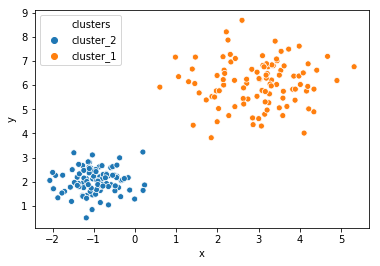

In [5]:
sn.scatterplot(x= "x", y = "y", hue= "clusters",data = dataset)

## Pseudocode for K_Means Clustering

1. Initialize M points/centroids from the dataset and number of iterations  
2. Find Euclidean distance between each point and each sample in data  
3. Assign each M points to the closet centroid denoting a cluster
4. Take mean of new points belonging to each centroid
5. Repeat step 2 to step 4 for the number of iterations or till a threshold is met

In [6]:
class K_Means(object):
    """K Means Algorithm."""
    def __init__(self, M, iters = 250):
        self. M = M
        self.iters = iters
               
    def initial_centroids(self):
        random_idx = np.random.permutation(self.X.shape[0])
        selected_index= random_idx[0:self.M]
        return self.X[selected_index]
    
    def compute_dist(self):
        cluster_dist = np.zeros((self.X.shape[0], self.M))
        for i in range(self.M):
            cluster_dist[:,i]= np.sqrt(np.sum((self.X - self.centroids[i])**2, axis=1))
        return cluster_dist
                    
    def update_centroids(self):
        for i in range(self.M):
            self.centroids[i] = np.mean(self.X[self.clusters == i])       
        return 
        
        
    def fit(self, X):
        self.clusters = np.zeros(X.shape[0])
        self.X= X
        self.centroids= self.initial_centroids()
        for i in range(self.iters):
            self.clusters = np.argmin(self.compute_dist(), axis =1)
            self.update_centroids()
              
    def clusters(self):
        return self.clusters
    
    def centroids(self):
        return self.centroids
    

In [7]:
X_train = dataset.iloc[:,[0,1]]

In [8]:
km = K_Means(2) # 2 clusters

In [9]:
km.fit(X_train.values)

In [10]:
km.clusters

array([1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1])

In [11]:
dataset["new_clusters"] = km.clusters
dataset.head()

,x,y,c,clusters,new_clusters
0,-0.334207,2.058738,-1.0,cluster_2,1
1,3.264395,5.636814,1.0,cluster_1,0
2,-0.669884,1.856185,-1.0,cluster_2,1
3,1.995284,4.484924,1.0,cluster_1,0
4,3.588041,4.739172,1.0,cluster_1,0


In [12]:
dataset["new_cluster_label"]= dataset["new_clusters"].replace({0:"cluster_1", 1: "cluster_2"})

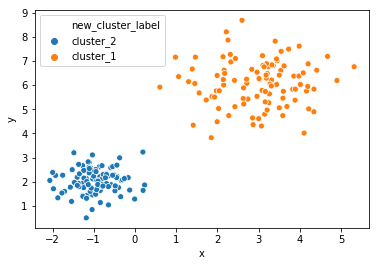

In [13]:
sn.scatterplot(x = "x", y = "y", hue= "new_cluster_label", data= dataset)

### Points correctly separated into clusters